# Machine Learning in Python Session 1

In this session we look at using `scikit` to perform linear regression in python. This is an incerdibly powerful tool and may seem like overkill here however it will utilise the SK Learn workflow which is used cross techniques for machione learning and forcasting. SK Learn os one of the most widely use machine learning libraries and used a lot in data science applications, so for future careers in data science it is very usefull to be familiar with it.

If you ever aply for a mechine learning job they will want this


In [43]:
# Set up 

# We needed to do install in the terminal 
# pip install statsmodels

import numpy as np 
import pandas as pd 

# machine learning packedges 
# we acn import just parts of a packedge 

from sklearn import datasets, linear_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# this imports the sum boduel from inside the moduel

import statsmodels.api as sm 

import matplotlib.pyplot as plt 


In [44]:
data_url = 'https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv'

df = pd.read_csv(data_url)


In [45]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [46]:
# lets build  simle linear regression model to see whether bmi predicts bloood 
# glucose 



in machine learning it is standard to label our IV as a capital X and our DV as a little y 

In [47]:
# our IV is bmi and ouur DV is blood glucose 
X = df['BMI'].to_numpy().reshape(-1,1)
y = df['Glucose'].to_numpy().reshape(-1,1)

this creates a pndas series however we want a one dimentionl one-py array that wil work like a list but be faster to run 

This is specific preprocessig that is needed to SK Learn 

In [48]:
# lets split this insto data we can learn from to make presictions
# and then dta that we can use to test how well or model works 
# this will also reduce the risk of overfitting 

# you want 70% to learn from and 30% to test - this is already common 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [50]:
regr = linear_model.LinearRegression()

Here the worls LinearRegression have appeared as green. This is because it is a class - where multiple mits of data are stored. This means regr is a regression class object that can store specific data 

In [51]:
# fitting our model 
regr.fit(X_train, y_train)

# create predicted y values 
y_pred = regr.predict(X_test)

In [52]:
# get our coefficient of determination - the R2 

print(f'coefficient of determination: %.2f' % r2_score(y_test, y_pred))
# the %2f jusr round to 2 sf 

coefficient of determination: 0.05


In [53]:
# lets print our coefficients 

print(f'Coefficiens: {regr.coef_}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

Coefficiens: [[0.88558366]]
MSE: 1070.586081656323


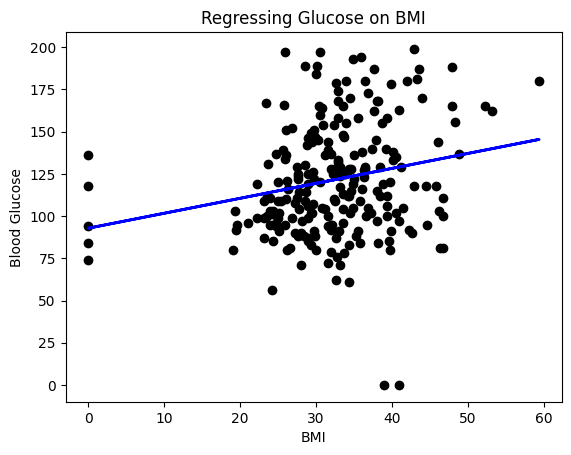

In [54]:
# lets create a scatter chart to plot our regression 

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose')
plt.title('Regressing Glucose on BMI')


plt.show()



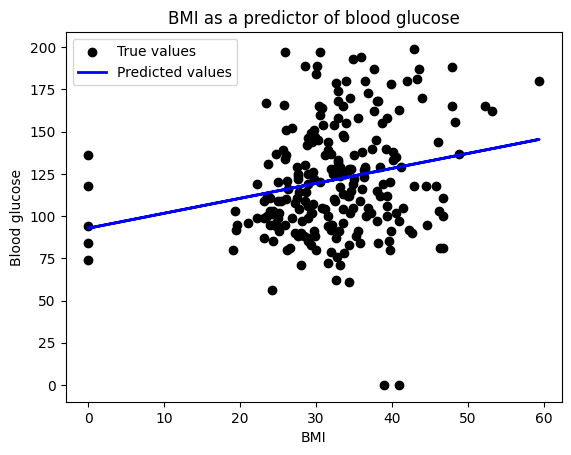

In [55]:
plt.scatter(X_test, y_test, color='black', label='True values')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted values')
 
plt.xlabel('BMI')
plt.ylabel('Blood glucose')
 
plt.legend(loc="upper left")
 
plt.title('BMI as a predictor of blood glucose')
 
plt.show()

Lets make a forcast - even though this is not a timeseries 



In [59]:
prediction_df = pd.DataFrame()

prediction_df['BMI'] = np.arange(60, 70)
prediction_df['Glucose'] = regr.predict(np.arange(60,70).reshape(-1,1))
prediction_df

,BMI,Glucose
0,60,145.940854
1,61,146.826438
2,62,147.712022
3,63,148.597605
4,64,149.483189
5,65,150.368773
6,66,151.254356
7,67,152.139940
8,68,153.025524
9,69,153.911107


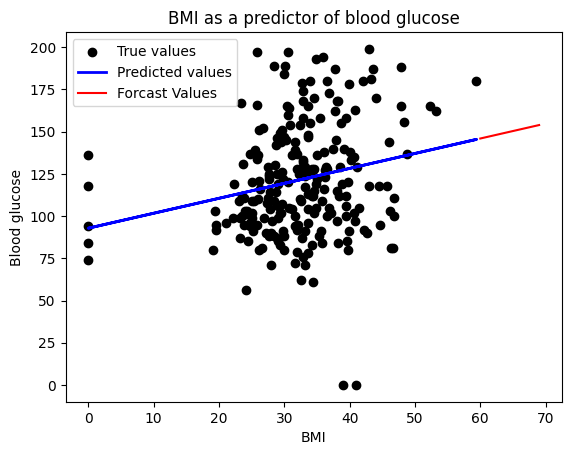

In [63]:
# addding the predicted values to the chart 

plt.scatter(X_test, y_test, color='black', label='True values')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted values')
plt.plot(prediction_df['BMI'], prediction_df['Glucose'], color='Red', label='Forcast Values')

plt.xlabel('BMI')
plt.ylabel('Blood glucose')
 
plt.legend(loc="upper left")
 
plt.title('BMI as a predictor of blood glucose')
 
plt.show()

Multi variate linear regression 

Using multiple IV to try and predict our DV 

we simply add mode data into x. this way it is a matrix rather than a vector and contains more than one value 

In [ ]:
# X and y 
# Train test split 
# make regression oblect 
# fit and predict 
# Check our coefficients 
# put in b values to predict outcomes

In [64]:
# X and y
X = df[['BMI', 'BloodPressure']]
y = df['Glucose'].to_numpy().reshape(-1,1)
 
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
 
# make a regression object
mv_regr = linear_model.LinearRegression()
 
# fit and predict
mv_regr.fit(X_train, y_train)
y_pred = mv_regr.predict(X_test)
 
#check out our coefficients etc
print(mv_regr.coef_)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
 
# put in some values to predict outcomes
mv_regr.predict(pd.DataFrame(
    [
        {'BMI':60,
         'BloodPressure':60},
        {'BMI':29,
         'BloodPressure':60},
    ]
))

[[0.79383156 0.14939686]]
937.8496194592817
0.06139750739575389


array([[141.34009517],
       [116.73131693]])